In [14]:
import numpy as np
import pandas as pd
import datetime, warnings

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

import nltk

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from wordcloud import WordCloud, STOPWORDS

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier

# Data Preprocessing

- dtype 변환해주기 : nominal 숫자 > object로, 날짜 object > datetimef로
- null : drop
- duplicates : drop

In [11]:
df_initial = pd.read_csv('customer.csv', encoding='ISO-8859-1', dtype={'CustomerID':str, 'InvoiceID':str})
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])

In [12]:
print('............ df_initial shape')
display(df_initial.shape)
print('............ df_initial dtype & null')
display(df_initial.info())
print('............ df_initial examples')
display(df_initial[:5])

............ df_initial shape


(541909, 8)

............ df_initial dtype & null
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


None

............ df_initial examples


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
df_initial.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [14]:
print('............ df_initial shape')
display(df_initial.shape)
print('............ df_initial dtype & null')
display(df_initial.info())
print('............ df_initial examples')
display(df_initial[:5])

............ df_initial shape


(406829, 8)

............ df_initial dtype & null
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


None

............ df_initial examples


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
print('............ df_initial duplicates')
display(df_initial.duplicated().sum())
df_initial.drop_duplicates(inplace=True)

............ df_initial duplicates


5225

# EDA

- invoiceNo : transaction, c means cancellation
- stockcode : product code
- description : product name
- quantitiy
- invoiceDate 
- UnitPrice
- CustomerID 
- Country

In [16]:
# Countries : 어떤 나라에서 주로 거래하는가 : United Kingdom

temp = df_initial[['InvoiceNo', 'Country']].groupby(['InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop=False)
countries = temp['Country'].value_counts()
countries

United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
Iceland                     7
USA                         7
Greece                      6
Israel                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Bahrain   

In [17]:
# Customer and products

pd.DataFrame([{
    'products':len(df_initial['StockCode'].value_counts()),
    'transactions':len(df_initial['InvoiceNo'].value_counts()),
    'customers':len(df_initial['CustomerID'].value_counts())
}], columns = ['products','transactions','customers'],
index = ['quantity']
)

,products,transactions,customers
quantity,3684,22190,4372


In [18]:
num_products = df_initial.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count().rename(columns={'InvoiceDate':'Number of products'})
num_products[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [19]:
# Cancelling orders : 꽤 많다

num_products['cancelling T/F'] = num_products['InvoiceNo'].apply(lambda x:int('C' in x))
display(num_products[:5])

n1 = num_products['cancelling T/F'].sum()
n2 = num_products.shape[0]

print('num of cancelling orders : {} / {} = {:.2f}%'.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,cancelling T/F
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


num of cancelling orders : 3654 / 22190 = 16.47%


In [20]:
# Cancel 시 data 비교 : 주문 data와 cancel data의

display(df_initial.sort_values('CustomerID')[:3])

print('\n............ data가 모두 동일한지 체크')
print('할인 받은 만큼 - 된 것이다')
df_cancel = df_initial[df_initial['Quantity']<0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for row, col in df_cancel.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity']== -col[1]) & (df_initial['Description']==col[2])].shape[0] == 0:
        print(df_cancel.loc[row])
        break
print('\n............ data가 모두 동일한지 체크 2')
print('구매 날짜가 2010년일 가능성이 있다')
df_cancel = df_initial[(df_initial['Quantity']<0) & (df_initial['Description']!='Discount')][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for row, col in df_cancel.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity']== -col[1]) & (df_initial['Description']==col[2])].shape[0] == 0:
        print(df_cancel.loc[row])
        break


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland



............ data가 모두 동일한지 체크
할인 받은 만큼 - 된 것이다
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object

............ data가 모두 동일한지 체크 2
구매 날짜가 2010년일 가능성이 있다
CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object


In [21]:
# cancel에 해당하는 데이터를 삭제한다

df_cleaned = df_initial.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

atleastone_counter = []
no_counter = []

for row, col in df_initial.iterrows():    # row와 multiple cols는 한 덩어리!      
    # 할인받은 row를 건너뛴 것                                                             
    if col['Quantity'] > 0 or col['Description'] == 'Discount':   
        continue
    
    # counterpart를 찾아본다 : 원본 주문 내역
    df_test = df_initial[
        (df_initial['CustomerID'] == col['CustomerID']) &
        (df_initial['StockCode'] == col['StockCode']) &
        (df_initial['InvoiceDate'] < col['InvoiceDate']) &
        (df_initial['Quantity'] > 0)].copy()
    
    # cancel without counterpart
    if df_test.shape[0] == 0 :
        no_counter.append(row)
    
    # cancel with counterpart
    elif df_test.shape[0] == 1:
        df_cleaned.loc[df_test.index[0], 'QuantityCanceled'] = -col['Quantity']
        atleastone_counter.append(row)
    
    # 여러번 취소된 경우, 전체취소만 
    elif df_test.shape[0] > 1:
        df_test.sort_index(axis=0, ascending=False, inplace=True)
        for row2, col2 in df_test.iterrows():
            if col2['Quantity'] < -col['Quantity']:
                continue
            df_cleaned.loc[row2, 'QuantityCanceled'] = -col['Quantity']
            atleastone_counter.append(row)
            break


In [22]:
df_cleaned.drop(atleastone_counter, axis = 0, inplace = True)
df_cleaned.drop(no_counter, axis = 0, inplace = True)

remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [23]:
# 잘못 cancel된 것

df_cleaned[(df_cleaned['CustomerID'] == '14048') & (df_cleaned['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
84247,543371,22464,HANGING METAL HEART LANTERN,3,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
84259,543371,22464,HANGING METAL HEART LANTERN,1,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0


In [26]:
# stockcode : 각 코드는 의미를 담고 있다

cond_containingletters = df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)
stockcode_containingletters = df_cleaned[cond_containingletters]['StockCode'].unique()
stockcode_containingletters

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [27]:
# 의미를 파악하기 위해 discription을 살펴보자

for code in stockcode_containingletters:
    dscrpt = df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]
    print(f'{code} -> {dscrpt}')

POST -> POSTAGE
D -> Discount
C2 -> CARRIAGE
M -> Manual
BANK CHARGES -> Bank Charges
PADS -> PADS TO MATCH ALL CUSHIONS
DOT -> DOTCOM POSTAGE


In [28]:
# 각 product의 총 구매 가격을 구한다

df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


In [29]:
# 각 주문별 총 구매 가격을 구해보자
basket_price = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
basket_time = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(basket_time['InvoiceDate_int'])
basket_price = basket_price[basket_price['TotalPrice'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,TotalPrice,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000001280


In [30]:
df_cleaned.to_csv('./customer2.csv', index=False)

In [31]:
df_cleaned = pd.read_csv('./customer2.csv')

In [32]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,InvoiceDate_int
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,1291191960000000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,1291191960000000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000


<AxesSubplot:xlabel='TotalPrice', ylabel='Density'>

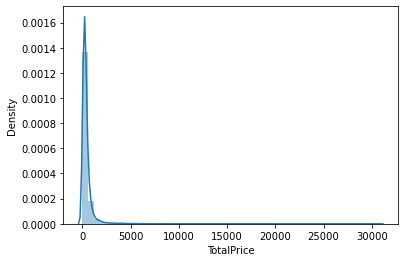

In [33]:
# 소규모 구매가 많다

display(sns.distplot(basket_price['TotalPrice']))

<AxesSubplot:xlabel='TotalPrice', ylabel='Density'>

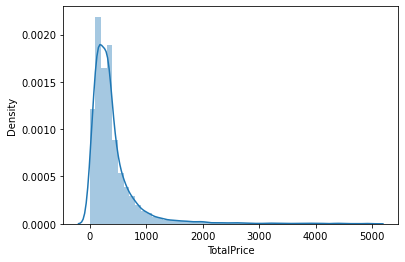

In [34]:
basket_price_nooutlier = basket_price[basket_price['TotalPrice']<5000]
display(sns.distplot(basket_price_nooutlier['TotalPrice']))

# NLP & 클러스터링을 활용한 라벨링

- Description이 유사한 제품끼리 클러스터로 묶겠다
- Description을 수치화해야 하는데
    - Description을 단어를 추출한다 (tokenize)
    - Description에 등장하는 명사만 뽑는다
    - 각 명사에서 어근을 추출한다 (stemming)
    - 많이 등장하는 어근들을 추린다
    - 어근과 product로 행렬을 만든다

- product 별로 홍보문구, 가격을 칼럼으로 하는 레코드를 생성한다.


In [35]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'Description'):
    stemmer = nltk.stem.SnowballStemmer('english')
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()
    icount = 0
    
    for s in dataframe[column]:
        if pd.isnull(s):
            continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)   # tokenize
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]       # 명사만 뽑는다 

        for t in nouns:
            t = t.lower()
            root = stemmer.stem(t)              # stemming
            if root in keywords_roots:
                keywords_roots[root].add(t)
                count_keywords[root] += 1
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1

    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:          # 같은 어근에 여러 단어가 있다면 (eg.apple, apples)
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k                     # 가장 길이가 짧은 단어가 대표 단어
                    min_length = len(k)      
            category_keys.append(key)
            keywords_select[s] = key
        else:
            category_keys.append(list(keywords_roots[s])[0])    # 대표 단어만 추린 것
            keywords_select[s] = list(keywords_roots[s])[0]     # 대표 : 여러 단어
    
    print(f'number of keywords in variable {column} : {len(category_keys)}')
    return category_keys, keywords_roots, keywords_select, count_keywords


In [36]:
df_product = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})

In [37]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_product)

number of keywords in variable Description : 1484


In [38]:
# 많이 등장한 단어만 추려보자

list_countkeywords = []
for k,v in count_keywords.items():
    list_countkeywords.append([keywords_select[k], v])
list_countkeywords.sort(key = lambda x:x[1], reverse=True)

In [39]:
cnt = [i[1] for i in list_countkeywords]
df_cnt = pd.DataFrame(cnt)
df_cnt.value_counts()

1      580
2      224
3      128
4       81
5       67
      ... 
56       1
64       1
65       1
70       1
267      1
Length: 78, dtype: int64

<AxesSubplot:>

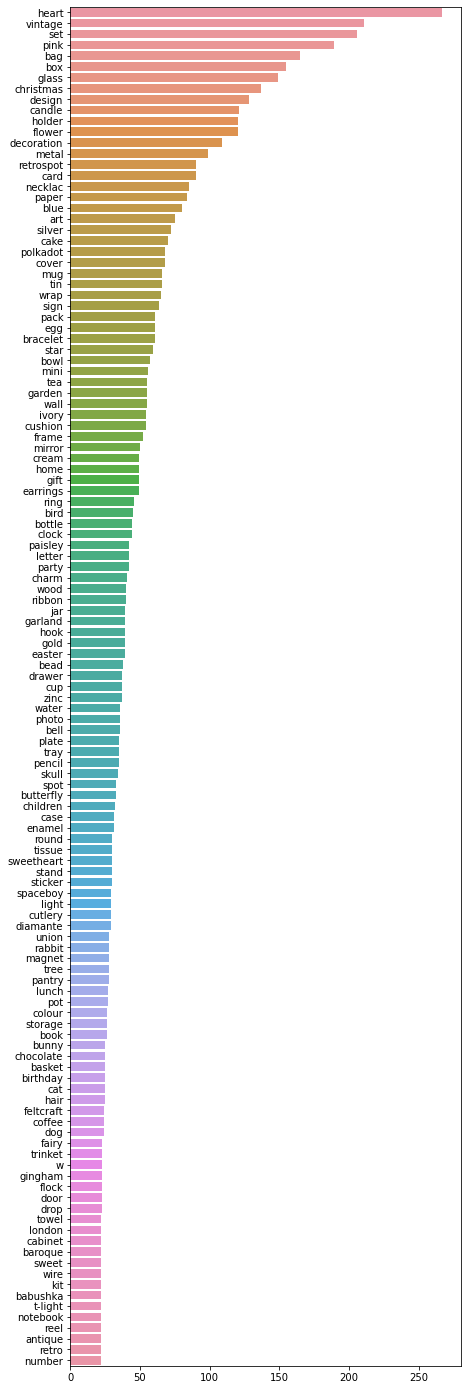

In [40]:
# 자주 등장하는 단어 가운데, 적절치 않은 것은 솎아낸다

word = [i[0] for i in list_countkeywords]
plt.figure(figsize=(7,25))
sns.barplot(x=cnt[:125], y=word[:125])


In [41]:
# 단어 가운데, 색깔 등 의미없는 정보는 제외하고, 13번 이상 등장한 것들을 추려낸다

list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']:
        continue
    if len(word) < 3 or v < 13:
        continue
    if ('+' in word) or ('/' in word):
        continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse=True)
print('remaining words: ', len(list_products))

remaining words:  193


In [42]:
# 추출한 단어를 바탕으로 각 description을 수치화한다.
# row : product / col : word / val : t/f
product_description = df_cleaned['Description'].unique()
X = pd.DataFrame()
for k, v in list_products:
    X.loc[:, k] = list(map(lambda x:int(k.upper() in x), product_description))

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

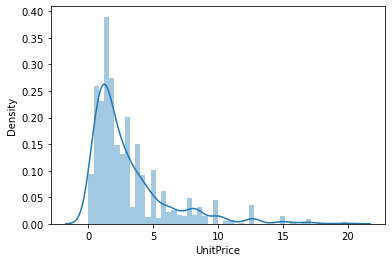

In [43]:
# 가격의 범위

productwise_price = df_cleaned[['UnitPrice','StockCode']].drop_duplicates(subset='StockCode')
cond_excluding_outlier_price = productwise_price['UnitPrice'] < 20
sns.distplot(productwise_price[cond_excluding_outlier_price]['UnitPrice'])

In [44]:
threshold = [0,1,2,3,5,10]
X.loc[:, threshold] = 0

In [45]:
for i, prod in enumerate(product_description):
    cond_find_product = df_cleaned['Description'] == prod
    price = df_cleaned[cond_find_product]['UnitPrice'].mean()

    j=0
    while price > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, threshold[j-1]] = 1

In [46]:
for i in threshold:
    print(i, X.loc[:,i].sum())

0 964
1 1009
2 673
3 606
5 470
10 156


In [47]:
X.to_csv('./customer3.csv', index=False)

In [48]:
X = pd.read_csv('./customer3.csv')

# 클러스터링

- K-means
    - 벡터 간의 거리가 가까우면 유사한 것으로 판단한다
    - 몇 개의 그룹으로 나눌 것인지 미리 정해주어야 한다
    - 칼럼이 너무 많으면 curse of dimensionality가 발생한다
    - 분포를 모르는 데이터에서 적용하면, 잘못 분류할 수 있다
    - scale을 조정해주어야 한다

- Mean Shift
    - 밀도가 높은 것으로 이동한다
    - 몇 개의 그룹으로 나눌지 모델이 스스로 정한다

In [49]:

for n_clusters in range(3, 10):
    kmeans = KMeans(init = 'k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print('for n_clusters = ', n_clusters, 'the avg silhoutte_score is :', silhouette_avg)

for n_clusters =  3 the avg silhoutte_score is : 0.10158702596012364
for n_clusters =  4 the avg silhoutte_score is : 0.1268004588393788
for n_clusters =  5 the avg silhoutte_score is : 0.14550040213065127
for n_clusters =  6 the avg silhoutte_score is : 0.1464032976311529
for n_clusters =  7 the avg silhoutte_score is : 0.1430675268922284
for n_clusters =  8 the avg silhoutte_score is : 0.13190392312814223
for n_clusters =  9 the avg silhoutte_score is : 0.1251520879502232


In [50]:
n_clusters = 5 
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init = 'k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print('for n_clusters = ', n_clusters, 'the avg silhoutte_score is :', silhouette_avg)

for n_clusters =  5 the avg silhoutte_score is : 0.12907612484500036
for n_clusters =  5 the avg silhoutte_score is : 0.14553871352885445


In [51]:
pd.Series(clusters).value_counts()

0    1118
4    1009
3     673
1     606
2     472
dtype: int64

In [11]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

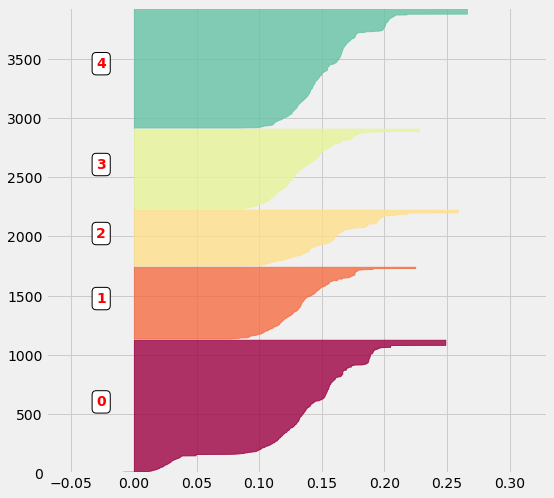

In [53]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(X, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [54]:
# i번째 클러스터에 많이 등장하는 단어를 워드클라우드로 살펴보자

descriptions = pd.DataFrame(product_description)
list_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    list_cluster = descriptions.loc[clusters == i]
    for word in list_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: 
            continue
        occurence[i][word] = sum(list_cluster.loc[:, 0].str.contains(word.upper()))

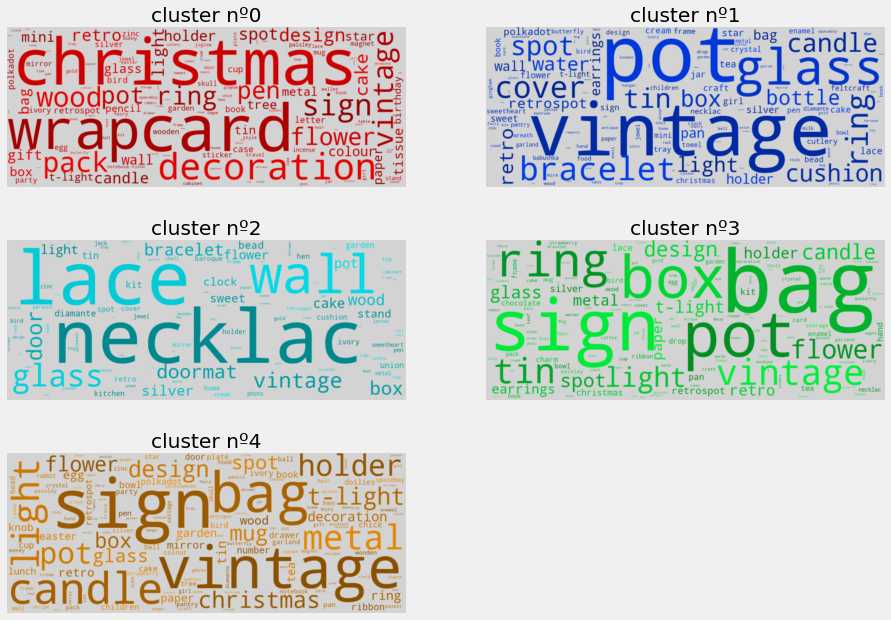

In [55]:
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)  

# 고객 분류 

## 전처리
고객의 주문금액(최소, 최대, 평균, 총합, 횟수), 자주 구매하는 물품 카테고리, 첫 이용일, 마지막 이용일을 바탕으로 고객을 분류한다

In [56]:
description_to_category = dict()
for key, val in zip(product_description, clusters):
    description_to_category[key] = val
df_cleaned['category'] = df_cleaned.loc[:, 'Description'].map(description_to_category)

In [58]:
for i in range(5):
    col = f'categ_{i}'
    df_temp = df_cleaned[df_cleaned['category'] == i]

    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x>0 else 0)

    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace=True)

In [ ]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [68]:
# 상품별로 되어있던 df를 주문별로 합친다
# 주문 내에 상품의 총 주문가격을 합친다
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#____________________________________________________________
# 주문 내에 상품 카테고리의 주문금액을 합친다
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 
#_____________________
# 주문 시각을 구한다
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# 총 주문가격이 0 초과인 것만 정렬한다
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347,537626,711.79,23.40,293.35,124.44,83.40,187.2,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,122.59,169.20,0.00,53.10,130.5,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,119.25,115.00,0.00,71.10,330.9,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,41.40,168.76,19.90,78.06,74.4,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,99.55,158.16,97.80,119.70,109.7,2011-08-02 08:48:00.000000000


In [83]:
set_train = basket_price[basket_price['InvoiceDate'].dt.month<10]
set_test = basket_price[basket_price['InvoiceDate'].dt.month>=10]
basket_price = set_train.copy(deep = True)

In [84]:
# 주문별로 되어있던 df를 고객별로 합친다
# 주문금액(최소, 최대, 평균, 총합, 횟수) + 구매하는 물품 카테고리의 분포
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum()/transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,4,382.52,636.25,519.767500,2079.07,18.411597,29.393912,5.661185,15.485770,31.047536
1,12348,3,227.44,367.00,301.480000,904.44,35.871921,0.000000,0.000000,0.000000,64.128079
2,12350,1,334.40,334.40,334.400000,334.40,23.654306,0.000000,0.000000,27.900718,48.444976
3,12352,6,144.35,840.30,345.663333,2073.98,53.725205,15.711338,14.301006,3.370331,12.892120
4,12353,1,89.00,89.00,89.000000,89.00,44.719101,0.000000,22.359551,19.887640,13.033708


In [93]:
# 첫 이용 일, 마지막 이용 일

last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,4,382.52,636.25,519.767500,2079.07,18.411597,29.393912,5.661185,15.485770,31.047536,59,247
1,12348,3,227.44,367.00,301.480000,904.44,35.871921,0.000000,0.000000,0.000000,64.128079,5,248
2,12350,1,334.40,334.40,334.400000,334.40,23.654306,0.000000,0.000000,27.900718,48.444976,240,240
3,12352,6,144.35,840.30,345.663333,2073.98,53.725205,15.711338,14.301006,3.370331,12.892120,2,226
4,12353,1,89.00,89.00,89.000000,89.00,44.719101,0.000000,22.359551,19.887640,13.033708,134,134


In [87]:
# 한번만 이용한 고객
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print(f"{n1}/{n2} ({n1/n2*100} %)")


1407/3428 (41.04434072345391 %)


In [94]:
transactions_per_user.to_csv('./customer4.csv', index=False)

In [2]:
transactions_per_user = pd.read_csv('./customer4.csv')

# 클러스터링 > 고객군 라벨링

- PCA 적용 후 클러스터링 수행
- 평가는 silhoutte 계수와 클러스터 별 특징

In [19]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols]

In [20]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  3.40665111 269.239      557.88005338 383.94381681  21.73567479
  16.07313331  15.72523306  21.08057193  25.39062392]


In [21]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

In [22]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.217


In [24]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb of clients']).T

,10,5,4,7,9,2,1,0,6,3,8
nb of clients,1447,432,322,315,278,267,188,147,13,11,8


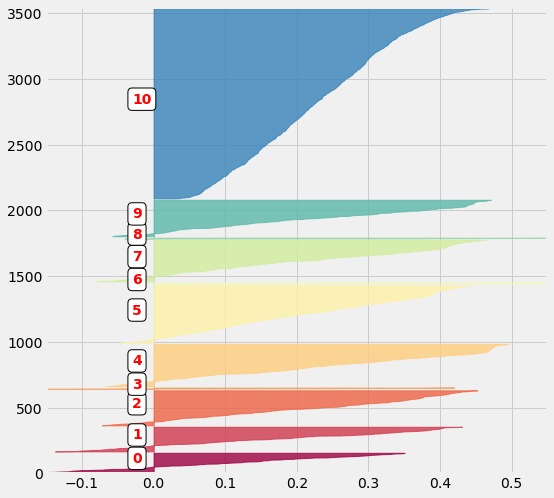

In [25]:
# 클러스터링 평가
# the different clusters are indeed disjoin globally

# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [26]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [40]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 3428


In [33]:
merged_df[:5]

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
0,4.0,2.139752,190.184068,315.162857,242.003315,557.224410,63.465006,6.548596,6.654725,9.130068,14.201604,97.000000,153.413043,322
1,2.0,1.981273,220.408764,361.754607,277.571499,641.893521,9.943914,51.025408,10.432035,14.315315,14.297517,89.775281,135.292135,267
2,7.0,2.387302,193.015714,310.579365,246.732800,620.129206,11.335101,12.388506,54.033978,11.065980,11.194348,106.984127,168.326984,315
3,9.0,2.410072,222.932230,364.995360,290.048819,767.886619,9.531628,6.704470,7.422482,60.993193,15.348227,87.553957,163.820144,278
4,5.0,2.351852,215.040903,321.716600,265.999030,643.823729,15.650250,7.656238,5.636478,12.823541,58.236939,96.717593,160.736111,432


In [41]:
specific = []
for i in range(5):
    column = 'categ_{}'.format(i)
    specific.append(merged_df[merged_df[column] > 45].index.values[0])
print(specific)
#___________________________________
specific_unspecific = specific
specific_unspecific += [ s for s in merged_df.index if s not in specific]
print(specific_unspecific )
#___________________________________________________________
merged_df = merged_df.reindex(index = specific_unspecific )
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

[4.0, 2.0, 7.0, 9.0, 5.0]
[4.0, 2.0, 7.0, 9.0, 5.0, 10.0, 1.0, 6.0, 0.0, 8.0, 3.0]


,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,4.0,2.139752,190.184068,315.162857,242.003315,557.224410,63.465006,6.548596,6.654725,9.130068,14.201604,322
1,2.0,1.981273,220.408764,361.754607,277.571499,641.893521,9.943914,51.025408,10.432035,14.315315,14.297517,267
2,7.0,2.387302,193.015714,310.579365,246.732800,620.129206,11.335101,12.388506,54.033978,11.065980,11.194348,315
3,9.0,2.410072,222.932230,364.995360,290.048819,767.886619,9.531628,6.704470,7.422482,60.993193,15.348227,278
4,5.0,2.351852,215.040903,321.716600,265.999030,643.823729,15.650250,7.656238,5.636478,12.823541,58.236939,432
5,10.0,3.067035,229.361480,462.636442,336.817213,1042.790105,21.434746,16.740050,15.200153,21.313682,25.315571,1447
6,1.0,1.659574,1032.082181,1397.775856,1203.014439,2144.066814,21.090561,17.342739,13.865244,22.168346,25.533469,188
7,6.0,1.615385,3413.781538,3862.296923,3616.137051,5692.562308,32.534814,16.488124,18.034637,13.419055,19.523370,13
8,0.0,16.360544,84.484422,1298.991701,513.599846,8107.544558,18.565078,15.603634,15.399742,25.994142,24.442014,147
9,8.0,75.875000,21.400000,2629.122500,445.349867,32752.790000,20.640545,13.562377,15.598843,25.708850,24.515145,8


# 예측하기

In [2]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [3]:
# selected_customers.to_csv('./customer5.csv', index=False)
selected_customers = pd.read_csv('./customer5.csv')

In [4]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [7]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

In [8]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [9]:
svc.grid_fit(X = X_train, Y = Y_train)

In [10]:
svc.grid_predict(X_test, Y_test)

Precision: 79.01 % 


In [11]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


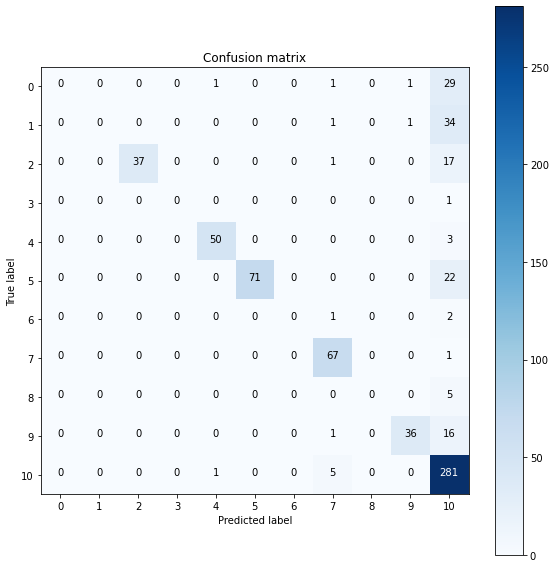

In [15]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

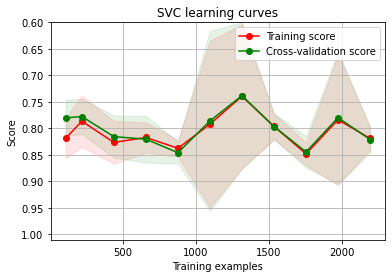

In [17]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])